# An Experimental Journey With Data to Inspire Your Work

## Introduction 

The Experiential Journey with Data to Inspire Your Work session will make you think differently about data and how it can solve problems! You will hear surprising use case that will make you think, sometimes laugh and hopefully inspire your own work. The use case and introductory material includes a hands-on experiential journey described below. The most valuable part of this session is that it is designed to help you gain experience and relate it to your work – so that when you leave you have a plan of action on how you can make data more useful in your organization to solve a key challenge.

A real-business application of analytics in “Improving Customer Experiences with Real-Time Insights” will be used as an example during the workshop. This experiential session will include a step by step journey on “How data science is helping companies to predict the customer experience journey and proactively address the issues, leading to the improvement of Net Promoter Score”. The session will also highlight the importance of using AI, Canvas, CRISP-DM (Cross Industry Standard Process for Data Mining) and Agile in Data Science projects.

The methodology involves consuming historical Net Promoter Score (NPS) data; using machine learning and artificial intelligence to identify the most important features and created an algorithm to predict the customer experience.

## Background

NPS has become the industry standard customer loyalty measurement. Businesses see customer experience as an imperative and would like to run analytics on and predict customer experience. Since competition is rife, keeping customers happy so they do not move their investments elsewhere is key to maintaining profitability.

Improving the customer experience is valuable because of its effect on our bottom line. Creating an ultimate experience that appeals to both the heart and the head is our goal. Customers give their money, fans give their hearts. 44% of consumers say that majority of customer experiences are bland and 69% of consumers say that emotions count for half their experiences.


## Approach

In this notebook, we'll use scikit-learn to predict the customer experience. scikit-learn, which is a machine learning library for the Python programming language, provides implementations of many classification algorithms. 
Here, we will apply multiple classification algorithms, evaluate the performance, and select the best peroforming algorithm based on performance metrics.

To help visualize what we are doing, we'll use 2D and 3D charts to show how the classes look with matplotlib and scikitplot python libraries.

<a id="top"></a>
## Table of Contents

1. [Introduction to Notebook](#getting_started)


2. [Install packages and verify the version](#load_libraries)


3. [Data Exploration](#explore_data)


4. [Feature Extraction](#prepare_data)


5. [Feature Scaling](#feature_extraction)


6. [Feature Selection](#feature_scaling)


7. [Split data into train and test sets](#split_data)


8. [Measure Model Performance](#model_selection)


9. [Evaluate and Select Model](#performance_metric)


10. [Save Model](#evaluate_model)


11. [Deployment](#deployment)


12. [Make Predictions](#interpretation)

<a id="getting_started"></a>
## 1. Introduction to Notebook
[Top](#top)

Quick set of instructions to work through the notebook (If you are new to Notebooks, here's a quick overview of how to work in this environment).

**a.** Notebook is a document representing all input and output of operations. This includes code, text input and numerical, text and rich media output. These files have ipynb extensions.

**b.** The notebook has 3 types of cells [**code cells, markdown cells**, and raw cells - markdown (text)]. 

   - Code cell allows you to edit and write new code, with full syntax highlighting and tab completion.

   - Markdown cell allows to  document the computational process in a literate way, alternating descriptive text with code, using rich text.

   - Raw cells provide a place in which you can write output directly.

**c.** Each cell with code can be executed independently or together (see options under the Cell menu). When working in this notebook, we will be running one cell to provide a hands-on experiential journey.


**d.** To run the cell, position cursor in the code cell and click the Run (arrow) icon. The cell is running when you see the * next to it. Some cells have printable output.


**e.** Work through this notebook by reading the instructions and executing code cell by cell. Some cells will require modifications before you run them. 

<a id="load_libraries"></a>
## 2. Load packages and verify the version
[Top](#top)

Library/ Package is collection of various packages. There is no difference between package and python library conceptually.

Module is a set of functions, globals and classes that you can import. Package or library is a set of modules.

In [1]:
%%capture
#Built-in magic commands https://ipython.readthedocs.io/en/stable/interactive/magics.html

#Load packages and libraries

#Provides information about constants, functions and methods of the Python interpreter 
#(https://docs.python.org/3/library/sys.html)
import sys 

#Scientific Computing (https://numpy.org/)
import numpy as np 

#Data manipulation and Analysis (https://pandas.pydata.org/pandas-docs/stable/)
import pandas as pd 

#Import and export spreadsheets and databases (https://docs.python.org/3/library/csv.html)
import csv 

#Manipulate dates and times (https://docs.python.org/3/library/datetime.html#module-datetime)
from datetime import datetime
import time

#Exploratory data analysis reports helps with quick data analysis (https://github.com/sfu-db/dataprep#dataprep)
!pip install dataprep
from dataprep.eda import plot, plot_missing, plot_correlation

#Profile reports helps with quick data analysis(https://github.com/pandas-profiling/pandas-profiling)
!pip install pandas-profiling[notebook]
from pandas_profiling import ProfileReport

#Prerequisite for pandas-profiling (https://ipywidgets.readthedocs.io/en/latest/)
!pip install ipywidgets==7.5.1 
from ipywidgets import widgets

#Plotting library https://matplotlib.org/
#!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt

#Python client library to quickly get started with the various Watson Developer Cloud services
!pip install ibm_watson 

#Token-based Identity and Access Management (IAM) authentication https://github.com/watson-developer-cloud/python-sdk
#allows error handling in more complex programs #https://ibm-watson-iot.github.io/iot-python/exceptions/
from ibm_watson import ApiException 
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator  

#Analyzes concepts, entities, keywords, categories, sentiment, emotion, relations, and semantic roles 
#github https://ibm.biz/Bdqf2U demo https://ibm.biz/Bdqf25
from ibm_watson import NaturalLanguageUnderstandingV1 
from ibm_watson.natural_language_understanding_v1 import Features, SentimentOptions, EmotionOptions

#Provides complete access to the IBM Cloud Object Storage API
!pip install boto3 
import ibm_boto3
from ibm_botocore.client import Config, ClientError

#Classification, Regression, Clustering, Dimensionality Reduction,Model Selection and Preprocesing (https://scikit-learn.org/)
import sklearn 
#Preprocessing data #https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing 
#Perform a train-test split
from sklearn.model_selection import train_test_split
#Transforms between zero and one
from sklearn.preprocessing import MinMaxScaler 
#Model evaluation metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Statistical graphics https://seaborn.pydata.org/introduction.html
import seaborn as sns

In [2]:
#Check version
print("Python %d.%d.%d%s%s"%sys.version_info)
print("Pandas %s"%pd.__version__)
print("Numpy %s"%np.__version__)
print("Scikit-learn %s"%sklearn.__version__)
print("CSV %s"%csv.__version__)
print("IBM boto3 %s"%ibm_boto3.__version__)
print("Matplotlib %s"%matplotlib.__version__)

Python 3.6.9final0
Pandas 1.0.5
Numpy 1.18.5
Scikit-learn 0.20.3
CSV 1.0
IBM boto3 2.4.3
Matplotlib 3.3.0


<a id="explore_data"></a>
## 3. Data exploration
[Top](#top)

<a id="load_libraries"></a>
### 3.1. Load and read the files from GitHub

[Top](#top)

In [3]:
#assign the urls of the files
nps = "https://raw.githubusercontent.com/neemadan/An-Experiential-Journey-With-Data-to-Inspire-Your-Work/master/nps_dataset.csv"

#read the files from the links and store in a dataframe
nps = pd.read_csv(nps)

<a id="load_libraries"></a>
### 3.2. Explore the data and perform quality audit [DataPrep.eda and Pandas Profiling](https://towardsdatascience.com/exploratory-data-analysis-dataprep-eda-vs-pandas-profiling-7137683fe47f)

[Top](#top)

#### Option 1: DataPrep.eda (2020) is a Python library for doing EDA produced by SFU’s Data Science Research Group.

In [4]:
#Generate Data Summary
plot(nps)

In [5]:
#View missing data
plot_missing(nps)
#plot_missing(nps, 'sentiment_overall')

In [6]:
#View correlation
plot_correlation(nps)
#plot_correlation(nps, 'sentiment_overall')

#### Option 2: Pandas Profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code.

#This package takes time (approx 20-30 mins), so please feel free to change this Markdown to Code cell and run this post the workshop.
profile = ProfileReport(nps, title="Pandas Profiling Report")
profile

<a id="feature_extraction"></a>
## 4. Feature Extraction
[Top](#top)

In [7]:
#This step assigns the columns by type for transformation to be applied (numerical, categorical, and categorical with high cardinality)
numcols = ['likelihood_to_recommend','assignment_count','meaningful_comm_count', 'first_meaningful_comm_duration_mins', 'all_avg_meaningful_comm_duration_mins',
           'age_of_account_days', 'life_time_spend_usd', 'monthly_recurring_revenue_usd', 'ticket_duration_days', 'sentiment_overall', 'anger_overall', 'disgust_overall', 
           'fear_overall', 'joy_overall', 'sadness_overall', 'sentiment_last3_conversation', 'anger_sentiment_last3', 'disgust_sentiment_last3', 
           'fear_sentiment_last3', 'joy_sentiment_last3', 'sadness_sentiment_last3', 'sentiment_last_conversation', 'anger_last_conversation', 'disgust_last_conversation', 
           'fear_last_conversation', 'joy_last_conversation', 'sadness_last_conversation', 'sentiment_short_description', 'anger_short_description',
           'disgust_short_description', 'fear_short_description', 'joy_short_description', 'sadness_short_description', 'sentiment_description', 'anger_description', 
           'disgust_description', 'fear_description', 'joy_description', 'sadness_description']
           
catcols_dummy = ['support_plan','account_type', 'sr_severity','technology_level_2', 'technology_level_3','case_origination_source', 'case_origination_user_type', 
                 'dayofweek', 'timewindow', 'severity_change','tribe_level_1', 'tribe_level_2']

catcols_hash = ['technology_level_1','catalog_name', 'country', 'geography', 'region']

In [8]:
#This step performs one hot encoding on categorical variables and hashing on categorical variables with high cardinality
nps_select = pd.concat([nps[numcols], pd.get_dummies(nps[catcols_dummy]),nps[catcols_hash]],axis=1)

for cat in catcols_hash:
    nps_select[cat] = nps_select[cat].apply(hash)

<a id="feature_scaling"></a>
## 5. Feature Scaling
[Top](#top)

In [9]:
#This step assigns the target variable to y and other features to X
y = nps_select['likelihood_to_recommend']
X = nps_select.copy()
del X['likelihood_to_recommend']

In [10]:
#This steps converts all the values in the dataframe to numeric
X = X.apply(pd.to_numeric, errors='coerce')

In [11]:
#This step assigns mean value to blank cells and thereafter uses MinMax to scale the data

X = X.fillna(X.mean())

scaler = MinMaxScaler()
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
scaler.fit(X)

X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
display(X.head())

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,assignment_count,meaningful_comm_count,first_meaningful_comm_duration_mins,all_avg_meaningful_comm_duration_mins,age_of_account_days,life_time_spend_usd,monthly_recurring_revenue_usd,ticket_duration_days,sentiment_overall,anger_overall,...,tribe_level_2_tribe_level_2_5,tribe_level_2_tribe_level_2_6,tribe_level_2_tribe_level_2_7,tribe_level_2_tribe_level_2_8,tribe_level_2_tribe_level_2_9,technology_level_1,catalog_name,country,geography,region
0,0.0,0.011494,0.000036,0.000022,0.137498,0.013560,0.012973,0.009550,0.599392,0.112563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.274432,0.860076,0.607115,0.512625
1,0.0,0.034483,0.000082,0.002144,0.137498,0.013560,0.012973,0.010914,0.599392,0.112563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.901789,0.032089,0.000000,0.000000
2,0.0,0.011494,0.000000,0.000004,0.012516,0.008398,0.000129,0.010914,0.599392,0.112563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.499500,0.806757,0.589324,0.365117
3,0.0,0.011494,0.000148,0.000097,0.035228,0.008407,0.000132,0.015007,0.599392,0.112563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.499500,0.296396,0.000000,0.317318
4,0.0,0.022989,0.000044,0.000068,0.137498,0.008357,0.012973,0.016371,0.599392,0.112563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.499500,0.860076,0.607115,0.512625


<a id="feature_scaling"></a>
## 6. Feature Selection
[Top](#top)

This is a filter-based method.  We check the absolute value of the Pearson's correlation between the target and numerical features in our dataset. We keep the top n features based on this criterion.

In [12]:
feature_name = list(X.columns)
# no of maximum features we need to select
num_feats=30

In [13]:
# Pearson's Correlation
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features:')
print(cor_feature)

30 selected features:
['technology_level_3_technology_level_3_16', 'tribe_level_2_tribe_level_2_8', 'tribe_level_1_tribe_level_1_13', 'tribe_level_2_tribe_level_2_4', 'technology_level_3_technology_level_3_57', 'tribe_level_1_tribe_level_1_4', 'technology_level_2_assignment_group_6', 'tribe_level_1_tribe_level_1_5', 'tribe_level_1_tribe_level_1_3', 'technology_level_2_assignment_group_4', 'severity_change_yes', 'severity_change_no', 'case_origination_source_case_origination_source_5', 'technology_level_3_technology_level_3_4', 'support_plan_support_tier_1', 'technology_level_3_technology_level_3_20', 'tribe_level_2_tribe_level_2_2', 'sr_severity', 'account_type_account_type_3', 'technology_level_3_technology_level_3_3', 'ticket_duration_days', 'tribe_level_1_tribe_level_1_6', 'tribe_level_1_tribe_level_1_2', 'assignment_count', 'account_type_account_type_1', 'meaningful_comm_count', 'support_plan_support_tier_2', 'first_meaningful_comm_duration_mins', 'technology_level_2_assignment_gro

In [14]:
#Select the top feature to use as in input to train the model
top_30_select = X[['tribe_level_2_tribe_level_2_8', 'tribe_level_1_tribe_level_1_13', 'tribe_level_2_tribe_level_2_4', 'technology_level_3_technology_level_3_57', 
                   'tribe_level_1_tribe_level_1_4', 'technology_level_2_assignment_group_6', 'geography', 'tribe_level_1_tribe_level_1_5', 'tribe_level_1_tribe_level_1_3', 
                   'technology_level_2_assignment_group_4', 'severity_change_yes', 'severity_change_no', 'case_origination_source_case_origination_source_5', 
                   'technology_level_3_technology_level_3_4', 'support_plan_support_tier_1', 'technology_level_3_technology_level_3_20', 'tribe_level_2_tribe_level_2_2', 
                   'sr_severity', 'account_type_account_type_3', 'technology_level_3_technology_level_3_3', 'ticket_duration_days', 'tribe_level_1_tribe_level_1_6', 
                   'tribe_level_1_tribe_level_1_2', 'assignment_count', 'account_type_account_type_1', 'meaningful_comm_count', 'support_plan_support_tier_2', 
                   'first_meaningful_comm_duration_mins', 'technology_level_2_assignment_group_2', 'all_avg_meaningful_comm_duration_mins']].copy()

<a id="feature_scaling"></a>
## 7. Split data into train and test sets

[Top](#top)

In [15]:
#This step perform a train-test split

X_train, X_test, y_train, y_test = train_test_split(top_30_select, y, test_size=0.30, random_state=123)
print("train and test data shape=")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print("testing data likelihood=")
print("1_Promoter=",np.sum(y_test))
print("0_Non Promoter=",len(y_test)-np.sum(y_test))

train and test data shape=
(2738, 30)
(1174, 30)
(2738,)
(1174,)
testing data likelihood=
1_Promoter= 476
0_Non Promoter= 698


<a id="feature_scaling"></a>
## 8. Measure Model Performance

[Top](#top)

In [16]:
def calculate_metrics(y_true,y_pred):
    print("precision, recall, and f1 score:", precision_recall_fscore_support(y_true, y_pred,average='macro'))
    print("accuracy score:", accuracy_score(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred,labels=[0,1]))

In [17]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=0, solver='lbfgs',class_weight="auto").fit(X_train, y_train)
y_pred= clf1.predict(X_test)
calculate_metrics(y_test,y_pred);

precision, recall, and f1 score: (0.584534967555876, 0.5395246923984494, 0.5000370315508814, None)
accuracy score: 0.6081771720613288
[[630  68]
 [392  84]]


In [18]:
from sklearn.linear_model import SGDClassifier
clf2 = SGDClassifier(max_iter=1000, tol=1e-3,class_weight="balanced").fit(X_train, y_train)
y_pred= clf2.predict(X_test)
calculate_metrics(y_test,y_pred);

precision, recall, and f1 score: (0.5941536384159335, 0.567157665358407, 0.4946600289816532, None)
accuracy score: 0.5119250425894378
[[192 506]
 [ 67 409]]


In [19]:
from sklearn import svm
clf3 = svm.SVC(gamma='scale',class_weight="balanced").fit(X_train, y_train)
y_pred= clf3.predict(X_test)
calculate_metrics(y_test,y_pred)

precision, recall, and f1 score: (0.5512645794966237, 0.5502696780718018, 0.5261730545876887, None)
accuracy score: 0.5264054514480409
[[296 402]
 [154 322]]


In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf4 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred= clf4.predict(X_test)
calculate_metrics(y_test,y_pred)

precision, recall, and f1 score: (0.5263713567916648, 0.5257488382172353, 0.5256717242386821, None)
accuracy score: 0.5477001703577513
[[448 250]
 [281 195]]


In [21]:
from sklearn.gaussian_process import GaussianProcessClassifier
clf5 = GaussianProcessClassifier(max_iter_predict = 300, random_state=0).fit(X_train, y_train)
y_pred= clf5.predict(X_test)
calculate_metrics(y_test,y_pred)

precision, recall, and f1 score: (0.5637522414920406, 0.5296405094989285, 0.4875628668099386, None)
accuracy score: 0.5988074957410562
[[625  73]
 [398  78]]


In [22]:
from sklearn.naive_bayes import MultinomialNB 
clf7 = MultinomialNB().fit(X_train, y_train) 
y_pred= clf7.predict(X_test) 
calculate_metrics(y_test,y_pred)

precision, recall, and f1 score: (0.5916278673631614, 0.5582847752281428, 0.539248068073283, None)
accuracy score: 0.6149914821124361
[[599  99]
 [353 123]]


In [23]:
from sklearn import tree 
clf8 = tree.DecisionTreeClassifier(class_weight="balanced").fit(X_train, y_train) 
y_pred= clf8.predict(X_test) 
calculate_metrics(y_test,y_pred)

precision, recall, and f1 score: (0.5476241169356151, 0.548472827526426, 0.5476522121486517, None)
accuracy score: 0.5596252129471891
[[424 274]
 [243 233]]


In [24]:
from sklearn.ensemble import RandomForestClassifier 
clf9 = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0,class_weight="balanced").fit(X_train, y_train) 
y_pred= clf9.predict(X_test) 
calculate_metrics(y_test,y_pred)

precision, recall, and f1 score: (0.5542659828765774, 0.5455743902145386, 0.5402509032339515, None)
accuracy score: 0.5851788756388415
[[527 171]
 [316 160]]


In [25]:
from sklearn.ensemble import GradientBoostingClassifier
clf10 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred= clf10.predict(X_test) 
calculate_metrics(y_test,y_pred)

precision, recall, and f1 score: (0.572214034284406, 0.5607588307529315, 0.5565610132441816, None)
accuracy score: 0.5996592844974447
[[535 163]
 [307 169]]


In [26]:
from sklearn.ensemble import VotingClassifier
clf11 = VotingClassifier(estimators=[('svm', clf9), ('rf', clf10)], voting='hard').fit(X_train, y_train)
y_pred= clf11.predict(X_test)
calculate_metrics(y_test,y_pred)

precision, recall, and f1 score: (0.5725999235035379, 0.5365630492884833, 0.5004948632826054, None)
accuracy score: 0.6030664395229983
[[620  78]
 [388  88]]


<a id="feature_scaling"></a>
## 9. Evaluate and Select Model

[Top](#top)

LogisticRegression
(0.584534967555876, 0.5395246923984494, 0.5000370315508814, None)
Accuracy: 60.82%
[[630  68]
 [392  84]]

SGDClassifier
(0.5941536384159335, 0.567157665358407, 0.4946600289816532, None)
Accuracy: 51.19%
[[192 506]
 [ 67 409]]

SVC
(0.5512645794966237, 0.5502696780718018, 0.5261730545876887, None)
Accuracy: 52.64%
[[296 402]
 [154 322]]

KNeighborsClassifier
(0.5263713567916648, 0.5257488382172353, 0.5256717242386821, None)
Accuracy: 54.77%
[[448 250]
 [281 195]]

GaussianProcessClassifier
(0.5637522414920406, 0.5296405094989285, 0.4875628668099386, None)
Accuracy: 59.88%
[[625  73]
 [398  78]]

DecisionTreeClassifier
(0.5476241169356151, 0.548472827526426, 0.5476522121486517, None)
Accuracy: 55.96%
[[424 274]
 [243 233]]

RandomForestClassifier
(0.5542659828765774, 0.5455743902145386, 0.5402509032339515, None)
Accuracy: 58.52%
[[527 171]
 [316 160]]

GradientBoostingClassifier
(0.572214034284406, 0.5607588307529315, 0.5565610132441816, None)
Accuracy: 59.97%
[[535 1

,Classifier,Accuracy
0,LogisticRegression,60.817717
0,VotingClassifier,60.306644
0,GradientBoostingClassifier,59.965928
0,GaussianProcessClassifier,59.880750
0,RandomForestClassifier,58.517888
0,DecisionTreeClassifier,55.962521
0,KNeighborsClassifier,54.770017
0,SVC,52.640545
0,SGDClassifier,51.192504


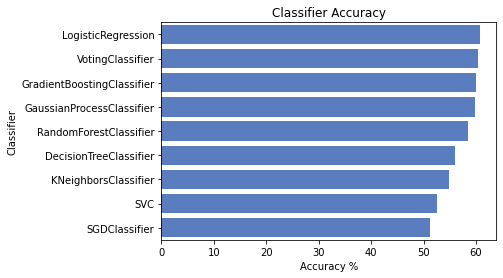

In [27]:
from sklearn.metrics import confusion_matrix #, plot_confusion_matrix

acc_log = pd.DataFrame(columns=["Classifier", "Accuracy"]) #create accuracy log dataframe
classifiers = [clf1, clf2, clf3, clf4, clf5, clf8, clf9, clf10, clf11] #list classifiers

for clf in classifiers:
    name = clf.__class__.__name__ #Get and print classifier name
    print(name)
    y_pred= clf.predict(X_test)
    
    print(precision_recall_fscore_support(y_test, y_pred,average='macro'))
    acc = accuracy_score(y_test, y_pred) #Get and print accuracy
    print("Accuracy: {:.2%}".format(acc)) 
    print(confusion_matrix(y_test, y_pred,labels=[0,1])) 
    #plot_confusion_matrix(clf, x_train, y_train, cmap=plt.cm.Blues)

    log_entry = pd.DataFrame([[name, acc*100]], columns=["Classifier", "Accuracy"])
    acc_log = acc_log.append(log_entry)
    print("")

#Format and print comparison of accuracy
acc_log = acc_log.sort_values(['Accuracy'], ascending = False)
display(acc_log)
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=acc_log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

<a id="feature_scaling"></a>
## 10. Save the Model

[Top](#top)

In [ ]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

wml_credentials = {
                   "url": "https://us-south.ml.cloud.ibm.com",
                   "apikey":"",
                   "instance_id": ""
                  }

client = WatsonMachineLearningAPIClient(wml_credentials)

In [39]:
#This steps is one time to save the model and needs to be rerun for re-traiing purpose only.
stored_model_details = client.repository.store_model(clf10, 'PoC_NPS_Conference')

<a id="feature_scaling"></a>
## 11. Deploy the Model

[Top](#top)

In [40]:
#This steps is one time to save the model and needs to be rerun for re-traiing purpose only.
import json
published_model_uid = client.repository.get_model_uid(stored_model_details)
model_details = client.repository.get_details(published_model_uid)
print(json.dumps(model_details, indent=2))

{
  "metadata": {
    "guid": "0ff260f3-b7ce-4e1f-a2ac-cbcc1c96d3e2",
    "url": "https://us-south.ml.cloud.ibm.com/v3/wml_instances/4e3826ef-cddb-4851-90f8-6a0c98e62c8a/published_models/0ff260f3-b7ce-4e1f-a2ac-cbcc1c96d3e2",
    "created_at": "2020-04-28T20:55:45.780Z",
    "modified_at": "2020-04-28T20:55:45.837Z"
  },
  "entity": {
    "runtime_environment": "python-3.6",
    "learning_configuration_url": "https://us-south.ml.cloud.ibm.com/v3/wml_instances/4e3826ef-cddb-4851-90f8-6a0c98e62c8a/published_models/0ff260f3-b7ce-4e1f-a2ac-cbcc1c96d3e2/learning_configuration",
    "name": "PoC_NPS_Conference",
    "learning_iterations_url": "https://us-south.ml.cloud.ibm.com/v3/wml_instances/4e3826ef-cddb-4851-90f8-6a0c98e62c8a/published_models/0ff260f3-b7ce-4e1f-a2ac-cbcc1c96d3e2/learning_iterations",
    "feedback_url": "https://us-south.ml.cloud.ibm.com/v3/wml_instances/4e3826ef-cddb-4851-90f8-6a0c98e62c8a/published_models/0ff260f3-b7ce-4e1f-a2ac-cbcc1c96d3e2/feedback",
    "latest_vers

In [41]:
#This steps is one time to save the model and needs to be rerun for re-traiing purpose only.
created_deployment = client.deployments.create(published_model_uid, name="PoC_OGDF_Customer_Experience_Conference")
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)



#######################################################################################

Synchronous deployment creation for uid: '0ff260f3-b7ce-4e1f-a2ac-cbcc1c96d3e2' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='0353ea6e-5102-489e-ad50-17c394e24ad3'
------------------------------------------------------------------------------------------------




<a id="feature_scaling"></a>
## 12. Make Predictions

[Top](#top)

In [42]:
def predict(row):
  scoring_endpoint = '' #fetch this from Watson Machine Learning services
  scoring_payload = {'fields': ['tribe_level_2_tribe_level_2_8', 'tribe_level_1_tribe_level_1_13', 'country', 'tribe_level_2_tribe_level_2_4', 'technology_level_3_technology_level_3_57', 
                                'tribe_level_1_tribe_level_1_4', 'technology_level_2_assignment_group_6', 'tribe_level_1_tribe_level_1_5', 'tribe_level_1_tribe_level_1_3', 
                                'technology_level_2_assignment_group_4', 'severity_change_yes', 'severity_change_no', 'case_origination_source_case_origination_source_5', 
                                'technology_level_3_technology_level_3_4', 'support_plan_support_tier_1', 'technology_level_3_technology_level_3_20', 'tribe_level_2_tribe_level_2_2', 
                                'sr_severity', 'account_type_account_type_3', 'technology_level_3_technology_level_3_3', 'ticket_duration_days', 'tribe_level_1_tribe_level_1_6', 
                                'tribe_level_1_tribe_level_1_2', 'assignment_count', 'account_type_account_type_1', 'meaningful_comm_count', 'support_plan_support_tier_2', 
                                'first_meaningful_comm_duration_mins', 'technology_level_2_assignment_group_2', 'all_avg_meaningful_comm_duration_mins'],
                     'values': [list(row)]}
  predict_flg = False #if prediction output fails for any reason
  num_retries = 5 #make another 5 attempts
  while(not predict_flg):
      try:
          predictions = client.deployments.score(scoring_endpoint, scoring_payload)
          predict_flg = True
      except Exception as ex:
          if ('Status code: 504' in str(ex) or 'Status code: 503' in str(ex)) and num_retries > 1:
              predict_flg = False
              num_retries = num_retries - 1
          else:
              raise ex
  return [0,predictions['values'][0][1][0]]

In [43]:
def predict_batch(df):
    df_temp = df.copy()
    df_temp[['target', 'probability']] = df_temp.apply(lambda row: pd.Series(predict(row)), axis=1)
    return df_temp

In [45]:
#run predictions on first few records
result = predict_batch(X_train[0:10])

#run predictions on all records
#result = predict_batch(X_select)
result

,tribe_level_2_tribe_level_2_8,tribe_level_1_tribe_level_1_13,tribe_level_2_tribe_level_2_4,technology_level_3_technology_level_3_57,tribe_level_1_tribe_level_1_4,technology_level_2_assignment_group_6,geography,tribe_level_1_tribe_level_1_5,tribe_level_1_tribe_level_1_3,technology_level_2_assignment_group_4,...,tribe_level_1_tribe_level_1_2,assignment_count,account_type_account_type_1,meaningful_comm_count,support_plan_support_tier_2,first_meaningful_comm_duration_mins,technology_level_2_assignment_group_2,all_avg_meaningful_comm_duration_mins,target,probability
898,0.0,0.0,0.0,0.0,0.0,0.0,0.474862,0.0,0.0,0.0,...,0.0,0.166667,0.0,0.022989,0.0,0.000343,0.0,0.009854,0.0,0.628992
3470,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,...,0.0,0.083333,0.0,0.040230,0.0,0.000000,0.0,0.000000,0.0,0.748526
2857,0.0,0.0,0.0,0.0,0.0,0.0,0.721213,0.0,0.0,0.0,...,0.0,0.083333,0.0,0.022989,1.0,0.004863,0.0,0.077421,0.0,0.858306
1846,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.017241,0.0,0.004413,0.0,0.003116,0.0,0.551850
1905,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.166667,1.0,0.028736,1.0,0.075603,0.0,0.035692,0.0,0.807217
2613,0.0,0.0,0.0,0.0,0.0,0.0,0.474862,0.0,0.0,0.0,...,0.0,0.083333,1.0,0.011494,1.0,0.006322,0.0,0.006411,0.0,0.512717
2142,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,1.0,0.022989,1.0,0.029707,0.0,0.013380,0.0,0.626291
4,0.0,0.0,0.0,0.0,0.0,0.0,0.721213,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.022989,0.0,0.000044,0.0,0.000068,0.0,0.423796
1672,0.0,0.0,0.0,0.0,0.0,0.0,0.721213,0.0,0.0,0.0,...,0.0,0.083333,0.0,0.017241,0.0,0.000178,0.0,0.000122,0.0,0.471661
2274,0.0,0.0,0.0,0.0,0.0,0.0,0.679928,0.0,0.0,1.0,...,0.0,0.000000,1.0,0.005747,1.0,0.006280,0.0,0.008239,0.0,0.580177
